# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#From Michael Schell
duplicate_rows = mouse_complete_df.loc[mouse_complete_df.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_rows

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_complete_df.copy()
duplicate_mice = duplicate_mice.loc[duplicate_mice['Mouse ID'] == "g989"]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data=mouse_complete_df[mouse_complete_df['Mouse ID'].isin(duplicate_rows)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
mean_tumor= clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor=clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor= clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sd_tumor = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sem_tumor = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_summary_stats=pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                "Median Tumor Volume": median_tumor,
                                   "Tumor Volume Variance": var_tumor,
                                   "Tumor Volume Standard Deviation": sd_tumor,
                                   "Tumor Volume Standard Error": sem_tumor})
# Assemble the resulting series into a single summary DataFrame.
mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Count for Each Drug')

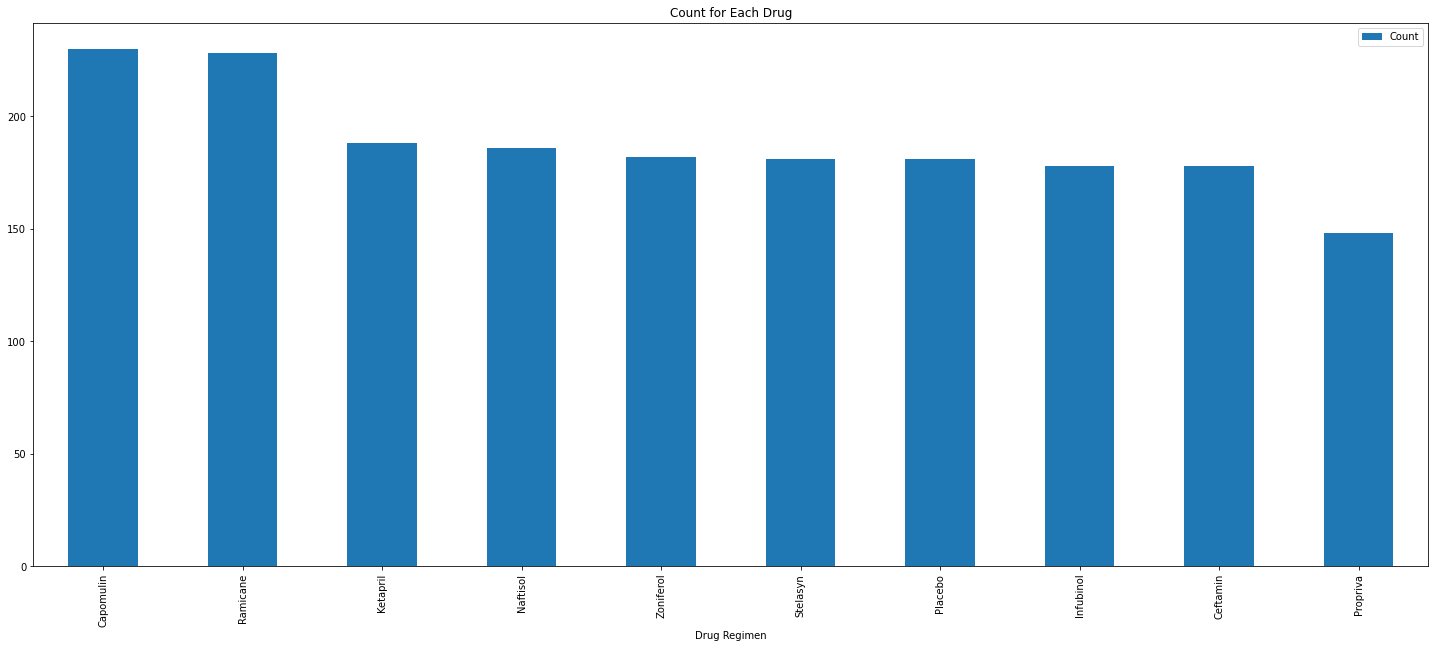

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_drug = clean_mouse_data["Drug Regimen"].value_counts()

#Used ChatGPT
count_per_drug_chart = pd.DataFrame({"Count": count_per_drug})
count_per_drug_chart = count_per_drug_chart.reset_index()
count_per_drug_chart.set_index("index", inplace=True)
count_per_drug_chart.index.name = "Drug Regimen"


#My Graph- did not use ChatGPT
count_per_drug_chart.plot(kind="bar", figsize=(25,10))
plt.title('Count for Each Drug')

Text(0, 0.5, '# Observed Mouse Timepoints')

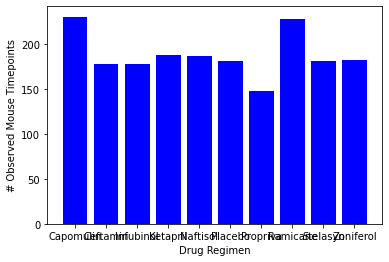

In [9]:
count=clean_mouse_data.groupby(['Drug Regimen'])['Timepoint'].count()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count.index, count, color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse Timepoints')

Text(0.5, 1.0, 'Count for Each Sex')

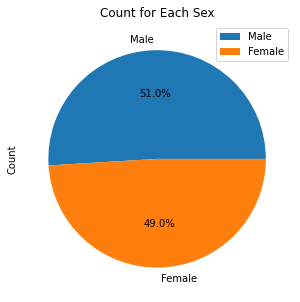

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_per_sex = clean_mouse_data['Sex'].value_counts()

#Used ChatGPT
count_per_sex_chart = pd.DataFrame({"Count": count_per_sex})

#My Graph- did not use ChatGPT
count_per_sex_chart.plot(kind="pie", y='Count', autopct='%1.1f%%', figsize=(5,5))
plt.title('Count for Each Sex')

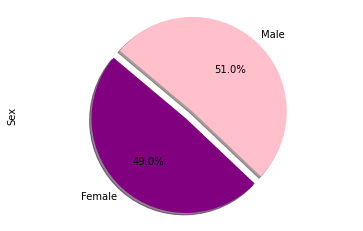

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_2=clean_mouse_data.groupby(['Sex'])['Mouse ID'].count()

# The colors of each section of the pie chart
colors = ["purple", "pink"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)


# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.pie(count_2, explode=explode, labels=count_2.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor=clean_mouse_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].last()
last_tumor_df=pd.DataFrame({"Last Tumor": last_tumor})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
updated_mouse_df = pd.merge(clean_mouse_data, last_tumor_df, on=["Mouse ID"])
updated_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Tumor
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878


In [15]:

# Locate the rows which contain mice on each drug and get the tumor volumes
drugs_in_treatment = updated_mouse_df.loc[(updated_mouse_df["Drug Regimen"] == "Capomulin") | 
                                          (updated_mouse_df["Drug Regimen"] == "Ramicane") | 
                                          (updated_mouse_df["Drug Regimen"] == "Infubinol")| 
                                          (updated_mouse_df["Drug Regimen"] == "Ceftamin"), :]    
# Create empty list to fill with tumor vol data (for plotting)
mice=[]

# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty dictionaries to store upper and lower bounds for each treatment
#Code is copied from ChatGPT
upper_bounds = {}
lower_bounds = {}

# Iterate over each treatment in the treatments list
#Code is copied from ChatGPT
for treatment in treatments:
    # Filter the drugs_in_treatment DataFrame for rows with the current treatment
    subset = drugs_in_treatment[drugs_in_treatment["Drug Regimen"] == treatment]
    
    # Calculate quartiles
    quartiles = subset['Tumor Volume (mm3)'].quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Calculate interquartile range (IQR)
    iqr = upperq - lowerq
    
    # Calculate lower and upper bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Store bounds in dictionaries
    lower_bounds[treatment] = lower_bound
    upper_bounds[treatment] = upper_bound

C:\Users\Anisha\AppData\Local\Temp\ipykernel_17344\2674596716.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_data.keys())


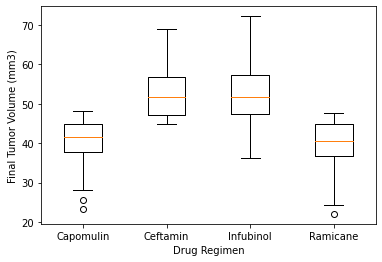

In [16]:
# Group data by 'Drug Regimen' and get the final tumor volume for each group
#From ChatGPT
grouped_data = drugs_in_treatment.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Convert the grouped data into a list of lists
#From ChatGPT
data = [values for key, values in grouped_data.items()]

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
#Used ChatGPT to help set the x-axis to be labeled as each of the drugs
ax1.set_xticklabels(grouped_data.keys())  
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

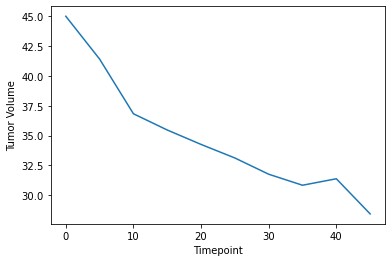

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = drugs_in_treatment.loc[(drugs_in_treatment["Drug Regimen"] == "Capomulin")]
single_capomulin_mouse=capomulin_mouse.loc[(capomulin_mouse["Mouse ID"] == "m601")]

plt.plot(single_capomulin_mouse.iloc[:, 1], single_capomulin_mouse.iloc[:, 2])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

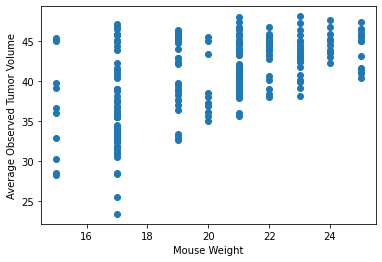

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_mouse.iloc[:,7], capomulin_mouse.iloc[:,2])
plt.xlabel('Mouse Weight')
plt.ylabel('Average Observed Tumor Volume')
plt.show

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and a linear regression model 
#Code for the correlation was pulled from class example 'Correlation_Solution_Checkpoint' (Week 5, Class 3, Activity 6)
weight=capomulin_mouse.iloc[:,7]
tumor_size=capomulin_mouse.iloc[:,2]
correlation = st.pearsonr(weight,tumor_size)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


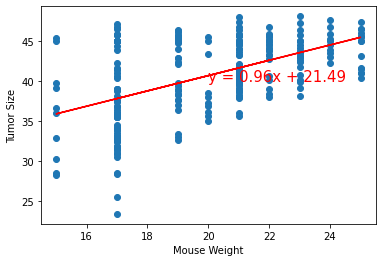

In [23]:
#Code for the correlation was pulled from class example 'Regression Solution' (Week 5, Class 3, Activity 8)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_size)
weight = np.array(weight)[:, None]
regress_values = weight * slope + intercept
#regress_values = np.array(regress_values)[:, None]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_size)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Size')
plt.show()